1. 2018-05-27 10:05:00: 重齿厂家，对机组进行齿轮箱巡检，发现齿轮箱二级大后轴承滚珠有磨损，经重齿厂家现场人员确认，机组可正常运行。
1. 2018-08-29 04:08:00: 对齿轮箱进行巡检，齿轮箱二级大后轴承存在磨损，需更换齿轮箱。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\san_tang_hu"
wind_turbine = "50"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (169, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

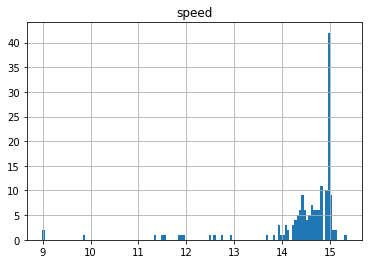

In [5]:
speed.hist(bins=128)

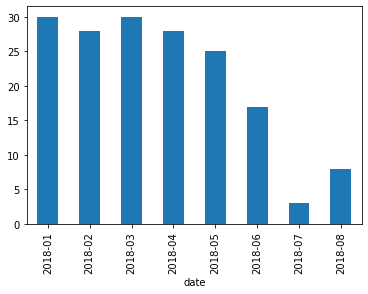

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [31]:
# 划分train set, test set
train_start = "2018-01"
train_end = "2018-04"

test_start = "2018-05"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (116, 75)
feature_test.shape: (53, 75)


In [32]:
feature_test = feature["2018-01": ]
# speed_test = speed

In [33]:
detector = model_entry.OutlierDetector()

In [34]:
detector.fit(feature_train)

<AxesSubplot:xlabel='date'>

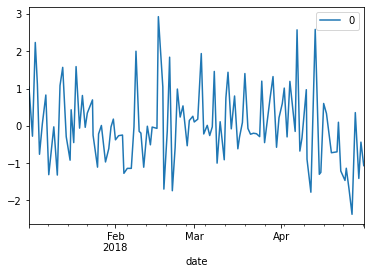

In [35]:
detector.decision_scores.plot()

In [36]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

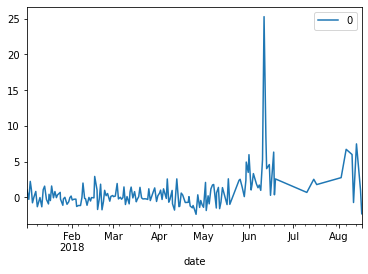

In [37]:
anomaly_scores.plot()

In [38]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,
2018-05-30 04:00,4.938137
2018-06-01 00:00,5.973187
2018-06-10 05:00,5.281923
2018-06-11 06:00,25.283894
2018-06-12 12:00,8.405303
2018-06-13 00:00,4.018046
2018-06-14 20:00,4.591839
2018-06-17 19:00,6.333868
2018-08-06 00:00,6.722352


In [41]:
feature_test.drop(index=anomaly_scores[anomaly_scores[0] > 20].index, inplace=True)

D:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

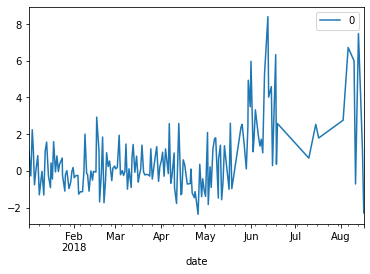

In [43]:
anomaly_scores.plot()

In [44]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,
2018-05-30 04:00,4.938137
2018-06-01 00:00,5.973187
2018-06-10 05:00,5.281923
2018-06-12 12:00,8.405303
2018-06-13 00:00,4.018046
2018-06-14 20:00,4.591839
2018-06-17 19:00,6.333868
2018-08-06 00:00,6.722352
2018-08-10 00:00,5.995166
